In [1]:
!pip install pandas numpy matplotlib scikit-learn yfinance ta-lib


Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies done
  Getting requirements to build wheel ... done
error
  error: subprocess-exited-with-error
  
  × pip subprocess to install backend dependencies did not run successfully.
  │ exit code: 1
  ╰─> [625 lines of output]
         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/16.4 MB ? eta -:--:--
         ━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.5/16.4 MB 3.7 MB/s eta 0:00:05
         ━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.5/16.4 MB 3.7 MB/s eta 0:00:05
         ━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.8/16.4 MB 1.4 MB/s eta 0:00:12
         ━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.8/16.4 MB 1.4 MB/s eta 0:00:12
         ━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.8/16.4 MB 1.4 MB/s eta 0:00:12
         ━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.8/16.4 MB 1.4 MB/s eta 0:00:12
         ━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.8/16.4 MB 1.4 MB/s eta 0:00:12
         ━╸━

In [2]:
!pip install pandas numpy matplotlib scikit-learn yfinance ta-lib


Defaulting to user installation because normal site-packages is not writeable
  Using cached ta_lib-0.6.3.tar.gz (376 kB)
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Installing backend dependencies ...done
  Preparing metadata (pyproject.toml) ... one
  error: subprocess-exited-with-error
  
  × Building wheel for ta-lib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [64 lines of output]
      <string>:83: UserWarning: Cannot find ta-lib library, installation may fail.
      /tmp/pip-build-env-ibqwemu_/overlay/local/lib/python3.10/dist-packages/setuptools/config/_apply_pyprojecttoml.py:82: SetuptoolsWarning: `install_requires` overwritten in `pyproject.toml` (dependencies)
        corresp(dist, value, root_dir)
      /tmp/pip-build-env-ibqwemu_/overlay/local/lib/python3.10/dist-packages/setuptools/config/_apply_pyprojecttoml.py:61: SetuptoolsDeprecationWarning: License classifiers are deprecated.
      !!
      
          

In [7]:
import yfinance as yf

stock_data = yf.download('AAPL', start='2010-01-01', end='2023-01-01', auto_adjust=False)
print(stock_data.head())


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Empty DataFrame
Columns: [(Adj Close, AAPL), (Close, AAPL), (High, AAPL), (Low, AAPL), (Open, AAPL), (Volume, AAPL)]
Index: []


In [8]:
import yfinance as yf
import time

# Wait before retrying
print("Waiting for 10 minutes due to rate limit...")
time.sleep(600)  

data = yf.download("AAPL", start="2010-01-01", end="2023-01-01", auto_adjust=False)
print(data.head())


Waiting for 10 minutes due to rate limit...


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Empty DataFrame
Columns: [(Adj Close, AAPL), (Close, AAPL), (High, AAPL), (Low, AAPL), (Open, AAPL), (Volume, AAPL)]
Index: []


In [9]:
import yfinance as yf

data = yf.download("MSFT", start="2010-01-01", end="2023-01-01", auto_adjust=False)
print(data.head())


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MSFT']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Empty DataFrame
Columns: [(Adj Close, MSFT), (Close, MSFT), (High, MSFT), (Low, MSFT), (Open, MSFT), (Volume, MSFT)]
Index: []


In [10]:
import pandas as pd
df = pd.read_csv("aapl_2010_2023.csv", parse_dates=['Date'], index_col='Date')
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'aapl_2010_2023.csv'

In [12]:
import pandas as pd
df = pd.read_csv("aapl_2010_2023(1).csv", parse_dates=['Date'], index_col='Date')
print(df.head())


             Open   High    Low  Close  Adj Close     Volume
Date                                                        
2010-01-04  30.49  30.64  30.34  30.57      27.57  123432400
2010-01-05  30.66  30.80  30.46  30.63      27.63  150476200
2010-01-06  30.63  30.72  30.51  30.59      27.59  138040000
2010-01-07  30.62  30.65  30.48  30.52      27.52  119282800
2010-01-08  30.95  31.10  30.75  30.88      27.88  111902700


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Handle missing values
stock_data = stock_data.dropna()

# Feature selection
features = stock_data[['Open', 'High', 'Low', 'Close', 'Volume']]
target = stock_data['Close']

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, shuffle=False)


ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by MinMaxScaler.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load CSV instead of using yfinance
stock_data = pd.read_csv("aapl_2010_2023(1).csv", parse_dates=["Date"], index_col="Date")

# Drop missing values
stock_data.dropna(inplace=True)

# Feature selection
features = stock_data[['Open', 'High', 'Low', 'Close', 'Volume']]
target = stock_data['Close']

# Sanity check
print("Feature shape:", features.shape)  # Should NOT be (0, 5)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, shuffle=False)


Feature shape: (5, 5)


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 0.14187473082014565
Mean Absolute Error: 0.37666262201092593


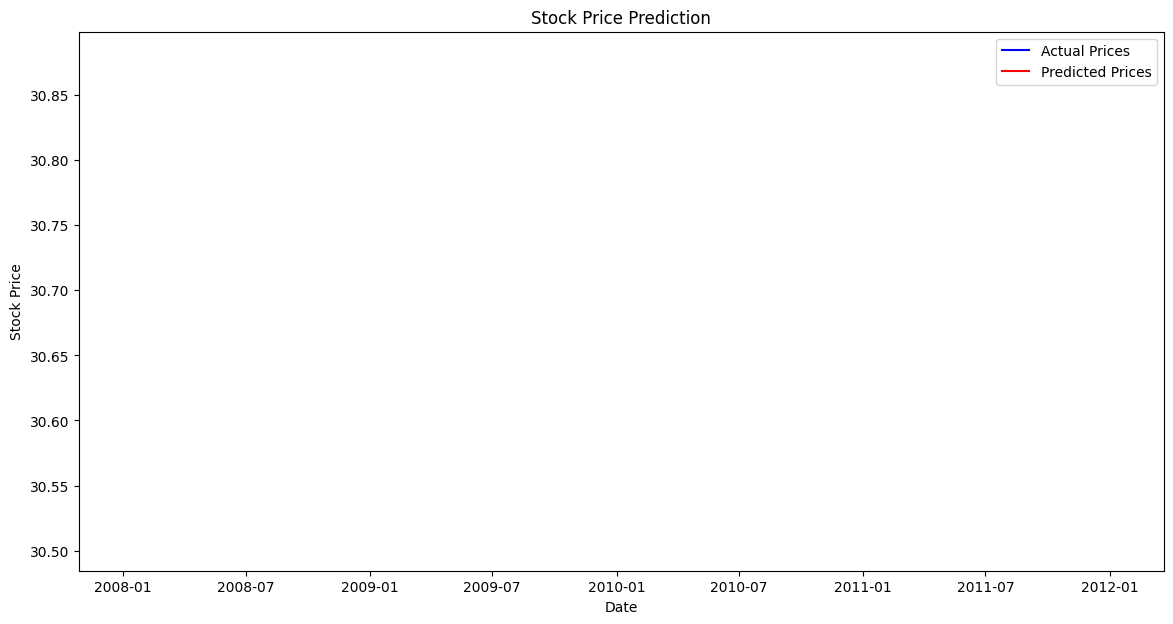

In [17]:
import matplotlib.pyplot as plt

# Plot actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(stock_data.index[-len(y_test):], y_test, color='blue', label='Actual Prices')
plt.plot(stock_data.index[-len(y_test):], predictions, color='red', label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [18]:
import talib

# Calculate technical indicators
stock_data['SMA'] = talib.SMA(stock_data['Close'], timeperiod=30)
stock_data['RSI'] = talib.RSI(stock_data['Close'], timeperiod=14)

# Add indicators to features
features = stock_data[['Open', 'High', 'Low', 'Close', 'Volume', 'SMA', 'RSI']].dropna()


ModuleNotFoundError: No module named 'talib'

In [19]:
!pip install ta


Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'ta' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'ta'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29429 sha256=edc08f1f7498d492b9b02449aa630d59c335277e885e0a9d3066b34a270d7955
  Stored in directory: /home/fidel/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [20]:
!pip install TA-Lib


Defaulting to user installation because normal site-packages is not writeable
  Using cached ta_lib-0.6.3.tar.gz (376 kB)
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Installing backend dependencies ... one
  Preparing metadata (pyproject.toml) ... one
  error: subprocess-exited-with-error
  
  × Building wheel for TA-Lib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [64 lines of output]
      <string>:83: UserWarning: Cannot find ta-lib library, installation may fail.
      /tmp/pip-build-env-45ne_whs/overlay/local/lib/python3.10/dist-packages/setuptools/config/_apply_pyprojecttoml.py:82: SetuptoolsWarning: `install_requires` overwritten in `pyproject.toml` (dependencies)
        corresp(dist, value, root_dir)
      /tmp/pip-build-env-45ne_whs/overlay/local/lib/python3.10/dist-packages/setuptools/config/_apply_pyprojecttoml.py:61: SetuptoolsDeprecationWarning: License classifiers are deprecated.
      !!
      
          

In [21]:
import ta

# Add technical indicators
stock_data['SMA'] = ta.trend.sma_indicator(stock_data['Close'], window=30)
stock_data['RSI'] = ta.momentum.rsi(stock_data['Close'], window=14)
